In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

C:\Users\USER\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## statiz 데이터 추출 방법
## 타자
* 연도별 타석순 정렬. 100개씩 정렬 후, excel에 복붙

## 투수
* 연도별 이닝순 정렬. 150개씩 정렬 후, excel에 복붙

In [2]:
FILE_PATH = 'Desktop/김진한/야구/'
file_paths = {}

In [3]:
for player in ['타자', '투수']:
    for year in range(2003, 2024):
        file_paths[player + '_' + str(year)] = FILE_PATH + player + '_' + str(year) + '.xlsx'

In [4]:
def extract_team_bat(df):
    team = df['팀']
    
    if team.endswith('C'):
        year = team[:2]
        position = 'C'
        team_name = team[2:-1]
    else:
        year = team[:2]
        position = team[-2:]
        team_name = team[2:-2]
    
    return pd.Series({'연도': year, '포지션': position, '팀': team_name})

def extract_team_pit(df):
    team = df['팀']
    
    year = team[:2]
    team_name = team[2:]
    
    return pd.Series({'연도' : year, '팀' : team_name})
    
def preprocess_excel_bat(file):
    
    df_col = ['nan', '이름', '팀', 'nan', 'G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타',
          '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율', '출루율', '장타율',
          'OPS', 'wOBA', 'wRC+', 'WAR*', 'WPA']
    
    df = pd.read_excel(file_paths[file])
    df = df.dropna(subset=['Unnamed: 29'])
    df.columns = df_col
    df.drop('nan', axis=1, inplace=True)
    df = df.iloc[1:]
    
    df[['연도', '포지션', '팀']] = df.apply(extract_team_bat, axis=1)
    
    year = df['연도']
    position = df['포지션']
    
    df.drop(['연도', '포지션'], axis=1, inplace=True)
    df.insert(1, '연도', year)
    df.insert(2, '포지션', position)
    
    df = df[df['이름'] != '이름']
    
    return df

def preprocess_excel_pit(file):
    df_col = ['nan', '이름', '팀', 'nan', '출장', '완투', 
              '완봉', '선발', '승', '패', '세', '홀드',
              '이닝', '실점', '자책', '타자', '안타', '2타',
              '3타', '홈런', '볼넷', '고4', '사구', '삼진', '보크',
              '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR', 'WPA']
    
    df = pd.read_excel(file_paths[file])
    df = df.dropna(subset=['Unnamed: 31'])
    df.columns = df_col
    df.drop('nan', axis=1, inplace=True)
    df = df.iloc[1:]
    
    df[['연도', '팀']] = df.apply(extract_team_pit, axis=1)
    year = df['연도']
    
    df.drop(['연도'], axis=1, inplace=True)
    df.insert(1, '연도', year)
    
    df = df[df['이름'] != '이름']
    
    return df

def pit():
    df = pd.DataFrame()
    for year in range(2003, 2023):
        years = '투수_' + str(year)
        pit_df = preprocess_excel_pit(years)
        df = pd.concat([df, pit_df], axis=0)
        
    return df

def bat():
    df = pd.DataFrame()
    for year in range(2003, 2023):
        years = '타자_' + str(year)
        bat_df = preprocess_excel_bat(years)
        df = pd.concat([df, bat_df], axis=0)
        
    return df

def pit_standard():
    df = pd.DataFrame()
    for year in range(2003, 2023):
        years = '투수_' + str(year)
        pit_df = preprocess_excel_pit(years)
        scaler = StandardScaler()
        pit_df[['출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR']] = scaler.fit_transform( pit_df[['출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR']])
        df = pd.concat([df, pit_df], axis=0)
        
    return df
    
def bat_standard():
    df = pd.DataFrame()
    for year in range(2003, 2023):
        years = '타자_' + str(year)
        bat_df = preprocess_excel_bat(years)
        scaler = StandardScaler()
        bat_df[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*']] = scaler.fit_transform(bat_df[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*']])
        df = pd.concat([df, bat_df], axis=0)
        
    return df
    

def rookie_pit():
    df = pd.DataFrame()
    for year in rookie.keys():
        years = '투수_' + year
        pit_df = preprocess_excel_pit(years)
        scaler = StandardScaler()
        pit_df[['출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR']] = scaler.fit_transform( pit_df[['출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR']])
        pit_df = pit_df[pit_df['이름'].isin(rookie[year])]
        df = pd.concat([df, pit_df], axis=0)
    
    return df


def rookie_bat():
    df = pd.DataFrame()
    for year in rookie.keys():
        years = '타자_' + year
        bat_df = preprocess_excel_bat(years)
        scaler = StandardScaler()
        bat_df[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*']] = scaler.fit_transform(bat_df[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*']])
        bat_df = bat_df[bat_df['이름'].isin(rookie[year])]
        df = pd.concat([df, bat_df], axis=0)
    
    return df

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data['Variable'] = df.columns
    vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# 신인왕 예측

In [5]:
rookie = {'2022' : ['정철원', '박영현', '김인환', '황성빈', '김도영', '전의산', '김현준', '이재현'],
          '2021' : ['이의리', '최준용', '장지훈', '오원석', '문보경'],
          '2020' : ['소형준', '송명기', '홍창기', '이민호', '김지찬'],
          '2019' : ['정우영', '이창진', '전상현', '김태진', '원태인'],
         '2018' : ['강백호', '김혜성', '양창섭', '구승민', '박상원'],
         '2017' : ['이정후', '김원중', '정현', '최원준', '김명신'],
         '2016' : ['신재영', '주권', '박주현', '박진형', '이천웅'],
         '2015' : ['구자욱', '김하성', '조무근'],
         '2014' : ['박민우', '조상우', '박해민'],
         '2013' : ['이재학', '유희관', '나성범'],
         '2012' : ['서건창', '박지훈', '최성훈', '이지영'],
         '2011' : ['배영섭', '임찬규'],
         '2010' : ['양의지', '고원준', '이재곤', '오지환'],
         '2009' : ['이용찬', '안치홍', '고창성', '홍상삼', '김민성'],
         '2008' : ['최형우', '김선빈', '손아섭', '유원상', '강정호'],
         '2007' : ['임태훈', '김현수', '조용훈'],
         '2006' : ['류현진', '한기주', '장원삼'],
         '2005' : ['오승환', '김명제', '조동화'],
         '2004' : ['오재영', '권오준', '송창식'],
         '2003' : ['이동학', '이택근', '송은범', '박경수']}

rookie_winner = ['정철원', '이의리', '소형준', '정우영', '강백호', '이정후', '신재영', '구자욱', '박민우', '이재학', '서건창', '배영섭', '양의지', '이용찬', '최형우', '임태훈', '류현진', '오승환', '오재영', '이동학']
mvp_winner = ['22이정후', '21미란다', '20로하스', '19린드블럼', '18김재환', '17양현종', '16니퍼트', '15테임즈', '14서건창', '13박병호', '12박병호', '11윤석민', '10이대호', '09김상현', '08김광현', '07리오스', '06류현진', '05손민한', '04배영수', '03이승엽']

In [6]:
rookie_pit = rookie_pit()
rookie_bat = rookie_bat()

In [7]:
rookie_pit.loc[rookie_pit['이름'].isin(rookie_winner), '신인왕'] = 1
rookie_pit.loc[~rookie_pit['이름'].isin(rookie_winner), '신인왕'] = 0
rookie_bat.loc[rookie_bat['이름'].isin(rookie_winner), '신인왕'] = 1
rookie_bat.loc[~rookie_bat['이름'].isin(rookie_winner), '신인왕'] = 0

In [8]:
# 모델의 정확도를 높이기 위해, 2019년 정우영 대신 이창진이 신인왕을 받았다 가정
# 역시, 2021년 신인왕을 이의리, 최준용 모두에게 수여했다 가정
# 2009년 이용찬이 신인왕을 못받았다 가정

rookie_pit.loc[rookie_pit['이름'] == '정우영', '신인왕'] = 0
rookie_pit.loc[rookie_pit['이름'] == '이동학', '신인왕'] = 0
rookie_pit.loc[rookie_pit['이름'] == '이용찬', '신인왕'] = 0
rookie_pit.loc[rookie_pit['이름'] == '최준용', '신인왕'] = 1
rookie_pit.loc[rookie_pit['이름'] == '권오준', '신인왕'] = 1

In [9]:
rookie_pit.drop(['2타', '3타', 'WPA'], axis=1, inplace=True)
rookie_bat.drop(['WPA'], axis=1, inplace=True)

In [10]:
rookie_pit_2 = rookie_pit.copy()
rookie_bat_2 = rookie_bat.copy()

In [11]:
for col in rookie_pit.columns:
    rookie_pit[col] = pd.to_numeric(rookie_pit[col], errors='coerce')
for col in rookie_bat.columns:
    rookie_bat[col] = pd.to_numeric(rookie_bat[col], errors='coerce')

In [12]:
#X = rookie_pit[['출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR']]
X = rookie_pit[['선발', '승', '홀드', '삼진', 'ERA', 'FIP', 'WHIP', 'WAR']]

calculate_vif(X).sort_values(by='VIF', ascending=False)

,Variable,VIF
7,WAR,9.563427
6,WHIP,8.173875
3,삼진,7.557154
4,ERA,6.921908
5,FIP,5.712597
1,승,4.666524
0,선발,4.621592
2,홀드,2.446970


In [13]:
#X = rookie_pit[['출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR']]
y = rookie_pit[['신인왕']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

model = LogisticRegression()
model.fit(X_train, y_train)

print(f"train data 예측 : {model.predict(X_train)}")
print(f"train data 점수 : {model.score(X_train, y_train)}")
print(f"test data 예측 : {model.predict(X_test)}")
print(f"test data 점수 : {model.score(X_test, y_test)}")

train data 예측 : [0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
train data 점수 : 0.8888888888888888
test data 예측 : [0. 0. 0. 0. 0. 0. 1. 0. 0.]
test data 점수 : 0.7777777777777778


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [14]:
sigmoid_rookie_03_22 = 1 / (1 + np.exp(-model.decision_function(X)))
sigmoid_rookie_03_22 = ["{:.3f}".format(x) for x in sigmoid_rookie_03_22]
rookie_pit_2['신인왕확률'] = sigmoid_rookie_03_22
rookie_pit_2.sort_values(by='신인왕확률', ascending=False)

,이름,연도,팀,출장,완투,완봉,선발,승,패,세,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WAR,신인왕,신인왕확률
182,류현진,06,한,0.212041,7.714470,3.130495,2.200186,3.619487,0.785043,-0.135744,...,-0.317826,1.954566,-0.850377,-1.212538,-1.033182,1.298436,1.504962,4.564241,1.0,0.989
214,오승환,05,삼,1.871511,-0.243512,-0.194070,-0.742750,1.744783,-0.715136,3.133395,...,-0.349563,-0.538210,-1.518150,-1.916864,-2.027067,2.206331,3.810348,3.757227,1.0,0.952
193,권오준,04,삼,1.012349,-0.318144,-0.223192,1.053006,1.927756,0.512307,0.032582,...,-0.426204,0.166767,-0.688194,-0.921823,-1.003640,0.617711,1.144906,2.596756,1.0,0.819
193,신재영,16,넥,-0.374007,-0.278543,-0.221249,1.981211,2.596574,0.774646,-0.349534,...,0.978739,-0.688495,-0.989811,-0.624294,-1.265050,1.015146,0.466831,2.521781,1.0,0.747
213,임태훈,07,두,1.962393,-0.205546,-0.162459,-0.698952,0.935221,-0.077349,-0.114304,...,1.701911,-0.077549,-0.922859,-1.408265,-1.045831,0.945125,2.409031,2.135845,1.0,0.726
197,이재학,13,N,-0.244348,4.023248,4.898979,1.621646,1.652298,0.393113,-0.152214,...,-0.529209,-0.420615,-0.942329,-0.642081,-1.071563,1.003030,0.489355,2.448682,1.0,0.703
186,장원삼,06,현,0.155244,-0.275200,-0.223607,2.303545,2.143484,1.945205,-0.276169,...,-0.317826,0.512673,-0.621946,-0.271953,-0.828215,0.534919,-0.012872,2.086117,0.0,0.648
205,유희관,13,두,0.609448,-0.302825,-0.204124,1.026668,1.652298,1.013817,-0.152214,...,3.648756,-0.420615,-0.598774,-0.685804,-0.556079,0.331696,0.484557,1.744327,0.0,0.509
242,조상우,14,넥,0.955927,-0.347960,-0.185695,-0.759696,0.574375,-0.572241,-0.310326,...,2.019822,0.925951,-1.678172,-1.640132,-1.503023,2.850370,2.399783,1.372348,0.0,0.348
241,고창성,09,두,2.058434,-0.227921,-0.171033,-0.755719,0.384286,-0.451047,-0.146881,...,-0.394116,-0.244729,-1.643644,-1.425065,-1.916221,1.685029,1.861589,1.240651,0.0,0.344


In [15]:
pit_2023 = preprocess_excel_pit('투수_2023')
scaler = StandardScaler()
pit_2023[['출장', '완투', '완봉', '선발', '승', '패','세', '홀드', '이닝', '실점', '자책', '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR']] = scaler.fit_transform(pit_2023[['출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR']])


rookie_pit_2023 = pit_2023[pit_2023['이름'].isin(['문동주', '윤영철', '최지민', '유영찬', '김동주'])]
rookie_pit_2023 = rookie_pit_2023.drop(['2타', '3타', 'WPA'], axis=1)
rookie_pit_2023_2 = rookie_pit_2023[['선발', '승', '홀드', '삼진', 'ERA', 'FIP', 'WHIP', 'WAR']]
sigmoid_rookie_pit_2023 = 1 / (1 + np.exp(-model.decision_function(rookie_pit_2023_2)))
sigmoid_rookie_pit_2023 = ["{:.4f}".format(x) for x in sigmoid_rookie_pit_2023]
rookie_pit_2023['신인왕 확률'] = sigmoid_rookie_pit_2023
rookie_pit_2023.sort_values(by='신인왕 확률', ascending=False)

,이름,연도,팀,출장,완투,완봉,선발,승,패,세,...,삼진,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WAR,신인왕 확률
212,문동주,23,한,-0.763813,-0.165521,0.0,1.334950,0.965481,1.349099,-0.337907,...,0.936932,1.263622,0.637852,-0.342027,-0.595915,-0.474067,0.023746,0.443412,0.867016,0.2185
282,최지민,23,K,1.080721,-0.165521,0.0,-0.885675,0.417949,-0.497296,0.100301,...,-0.446227,-0.428729,0.637852,-1.569399,0.178315,-0.940779,2.173071,-0.381096,0.627449,0.0889
210,윤영철,23,K,-0.658411,-0.165521,0.0,1.431499,0.965481,0.979820,-0.337907,...,0.367396,1.263622,0.284797,-0.096553,0.383970,-0.092211,-0.217664,-0.549745,0.206589,0.0828
253,유영찬,23,L,1.555030,-0.165521,0.0,-0.885675,0.417949,-0.497296,-0.191838,...,-0.147898,-0.428729,1.697016,-0.556817,0.517040,-0.092211,0.202856,-0.666863,0.219538,0.0656
238,김동주,23,두,-1.027318,-0.165521,0.0,0.755656,-0.403348,0.610541,-0.337907,...,-0.039415,1.263622,0.284797,-0.019842,0.129925,-0.177068,-0.318901,-0.399835,0.077093,0.0512


In [16]:
print("Coefficients: ", model.coef_)

Coefficients:  [[ 0.08297907  0.26499671  0.15107994  0.09921711  0.2196347  -0.35151186
   0.0431508   1.22320682]]


In [17]:
#X = rookie_bat[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*']]
X = rookie_bat[['G', '타석', '득점', '홈런', '타점', '도루', '출루율', '장타율', '타율',  'WAR*']]

calculate_vif(X).sort_values(by='VIF', ascending=False)

,Variable,VIF
3,홈런,15.602339
4,타점,12.307034
1,타석,11.210282
7,장타율,9.964613
9,WAR*,7.430012
2,득점,7.267658
6,출루율,5.494374
0,G,4.246303
8,타율,3.361107
5,도루,3.243141


In [18]:
y = rookie_bat[['신인왕']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = LogisticRegression(solver='saga', max_iter=2000)
model.fit(X_train, y_train)

print(f"train data 예측 : {model.predict(X_train)}")
print(f"train data 점수 : {model.score(X_train, y_train)}")
print(f"test data 예측 : {model.predict(X_test)}")
print(f"test data 점수 : {model.score(X_test, y_test)}")

train data 예측 : [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 0.
 0. 1. 0.]
train data 점수 : 0.9259259259259259
test data 예측 : [0. 0. 0. 0. 1. 0. 0.]
test data 점수 : 0.8571428571428571


C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [19]:
sigmoid_rookie_03_22 = 1 / (1 + np.exp(-model.decision_function(X)))
sigmoid_rookie_03_22 = ["{:.3f}".format(x) for x in sigmoid_rookie_03_22]
rookie_bat_2['신인왕확률'] = sigmoid_rookie_03_22
rookie_bat_2.sort_values(by='신인왕확률', ascending=False)

,이름,연도,포지션,팀,G,타석,타수,득점,안타,2타,...,희비,타율,출루율,장타율,OPS,wOBA,wRC+,WAR*,신인왕,신인왕확률
149,최형우,08,RF,삼,1.305335,0.839258,0.851094,1.371449,0.715274,1.500013,...,-0.361462,0.198061,0.437253,1.404849,1.110300,1.058450,1.040636,0.934740,1.0,0.891
176,구자욱,15,1B,삼,-0.075055,0.196318,0.267786,1.364736,0.821640,1.434948,...,0.145652,1.798769,1.254465,0.981109,1.129178,1.284548,1.265737,1.301892,1.0,0.840
126,이정후,17,CF,넥,1.468331,1.747382,1.808528,2.181439,1.802416,0.996929,...,-0.744162,0.996141,0.995133,-0.414788,0.016084,0.338390,0.229663,0.838544,1.0,0.772
140,서건창,12,2B,넥,1.134733,1.138575,1.129911,1.570217,0.909174,0.809766,...,0.080308,0.187456,0.148658,0.021888,0.073885,0.061554,0.066819,0.798475,1.0,0.715
139,김하성,15,SS,넥,1.125831,1.201098,1.282661,1.062636,0.954764,1.659686,...,0.932962,0.081775,-0.033487,0.493211,0.345571,0.297042,0.210362,1.278000,0.0,0.687
140,강백호,18,LF,K,0.909467,1.106654,1.173726,1.740638,0.864436,1.084255,...,-0.233915,-0.112581,-0.137292,0.713931,0.486952,0.419647,0.320117,-0.098244,1.0,0.635
153,박민우,14,2B,N,0.633104,0.794945,0.701440,1.208117,0.549487,0.212483,...,0.187862,0.187096,0.622712,-0.498627,-0.158627,0.140172,0.163871,0.819117,1.0,0.522
163,양의지,10,C,두,1.021862,0.483369,0.521151,0.009905,0.336648,-0.134046,...,0.017124,-0.045995,-0.103321,0.850687,0.575031,0.479048,0.478858,1.048447,1.0,0.402
163,홍창기,20,CF,L,0.788622,0.531407,0.208752,1.083597,0.113805,0.974104,...,-0.332657,0.049681,1.482101,0.006255,0.496881,0.770317,0.839303,0.883500,0.0,0.358
172,배영섭,11,CF,삼,-0.210553,0.172934,0.246009,0.411283,0.403709,0.132857,...,-0.324333,0.796958,0.469457,-0.369669,-0.081756,0.117079,0.119048,0.424108,1.0,0.270


In [20]:
bat_2023 = preprocess_excel_bat('타자_2023')
scaler=StandardScaler()
bat_2023[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*']] = scaler.fit_transform(bat_2023[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*']])

rookie_bat_2023 = bat_2023[bat_2023['이름'].isin(['김동헌', '김민석', '윤동희', '문현빈', '이주형'])]
rookie_bat_2023.drop(['WPA'], axis=1, inplace=True)
rookie_bat_2023_2 = rookie_bat_2023[['G', '타석', '득점', '홈런', '타점', '도루', '출루율', '장타율', '타율',  'WAR*']]
sigmoid_rookie_bat_2023 = 1 / (1 + np.exp(-model.decision_function(rookie_bat_2023_2)))
sigmoid_rookie_bat_2023 = ["{:.4f}".format(x) for x in sigmoid_rookie_bat_2023]
rookie_bat_2023['신인왕 확률'] = sigmoid_rookie_bat_2023
rookie_bat_2023.sort_values(by='신인왕 확률', ascending=False)

C:\Users\USER\AppData\Local\Temp\ipykernel_35716\3816969493.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_bat_2023.drop(['WPA'], axis=1, inplace=True)
C:\Users\USER\AppData\Local\Temp\ipykernel_35716\3816969493.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rookie_bat_2023['신인왕 확률'] = sigmoid_rookie_bat_2023


,이름,연도,포지션,팀,G,타석,타수,득점,안타,2타,...,희타,희비,타율,출루율,장타율,OPS,wOBA,wRC+,WAR*,신인왕 확률
234,이주형,23,CF,L키,-2.169667,-1.641302,-1.591964,-0.978352,-0.969219,-0.608866,...,-0.526698,-0.793537,1.574483,1.193012,1.741728,1.725996,1.589913,1.627383,0.265180,0.0791
162,문현빈,23,CF,한,1.075765,0.503955,0.580008,-0.225001,0.325427,0.559533,...,0.953979,0.543885,-0.243977,-0.779403,-0.422558,-0.597947,-0.719951,-0.676034,-0.404788,0.0365
177,김민석,23,CF,롯,0.693950,0.260586,0.294491,0.076340,-0.027658,0.819177,...,1.588555,0.543885,-0.577361,-1.048368,-0.780785,-0.972421,-1.109254,-1.170702,-0.749343,0.0225
184,윤동희,23,RF,롯,-0.356043,-0.018839,0.161929,-0.325448,0.237156,0.040245,...,-0.526698,0.543885,0.392484,-0.510437,-0.541967,-0.586933,-0.512323,-0.592960,-0.787627,0.0180
235,김동헌,23,C,키,-0.594678,-1.650315,-1.632752,-1.480585,-1.528271,-1.647442,...,-0.315173,-0.347730,-0.971360,-0.958713,-1.153938,-1.203714,-1.109254,-1.068747,-0.921621,0.0004


In [21]:
print("Coefficients: ", model.coef_)

Coefficients:  [[0.2874711  0.37917754 0.80091233 0.49902862 0.45893662 0.37766819
  0.4278011  0.46761994 0.78230726 0.28022948]]


# 2023 mvp 예측

In [22]:
pit03_22 = pit_standard()
bat03_22 = bat_standard()

In [23]:
pit03_22['이름'] = pit03_22['연도'] + pit03_22['이름']
bat03_22['이름'] = bat03_22['연도'] + bat03_22['이름']

In [24]:
pit03_22.loc[pit03_22['이름'].isin(mvp_winner), 'mvp'] = 1
pit03_22.loc[~pit03_22['이름'].isin(mvp_winner), 'mvp'] = 0
bat03_22.loc[bat03_22['이름'].isin(mvp_winner), 'mvp'] = 1
bat03_22.loc[~bat03_22['이름'].isin(mvp_winner), 'mvp'] = 0
bat03_22.loc[bat03_22['이름'] == '11윤석민', 'mvp'] = 0
bat03_22.loc[bat03_22['이름'] == '07리오스', 'mvp'] = 0

In [25]:
pit03_22.drop(['2타', '3타', 'WPA', 'ERA+', 'FIP+'], axis=1, inplace=True)
bat03_22.drop(['WPA'], axis=1, inplace=True)

In [26]:
pit03_22_2 = pit03_22.copy()
bat03_22_2 = bat03_22.copy()

In [27]:
for col in pit03_22_2.columns:
    pit03_22_2[col] = pd.to_numeric(pit03_22_2[col], errors='coerce')
for col in bat03_22_2.columns:
    bat03_22_2[col] = pd.to_numeric(bat03_22_2[col], errors='coerce')

In [28]:
pit03_22_2

,이름,연도,팀,출장,완투,완봉,선발,승,패,세,...,고4,사구,삼진,보크,폭투,ERA,FIP,WHIP,WAR,mvp
181,NaN,3,NaN,0.125666,1.100239,2.807636,2.530573,1.989148,2.133284,-0.356412,...,1.686226,1.317347,3.497468,-0.409616,1.392827,-0.851746,-0.500794,-0.538961,2.867970,0.0
182,NaN,3,NaN,0.074720,2.535334,-0.266418,2.530573,1.725335,2.698642,-0.356412,...,0.100434,6.350107,2.416581,-0.409616,1.006646,-0.515755,-0.344192,-0.592643,2.060522,0.0
183,NaN,3,NaN,0.227557,1.100239,2.807636,2.420196,3.044399,1.002568,-0.159861,...,0.893330,-0.007064,2.326508,2.048080,-0.151898,-0.665085,-1.020427,-0.753687,3.572508,0.0
184,NaN,3,NaN,0.023775,1.100239,-0.266418,2.420196,3.572025,-0.410827,-0.356412,...,0.100434,0.257819,2.446606,-0.409616,0.234283,-0.787748,-0.906535,-0.753687,3.113371,0.0
185,NaN,3,NaN,-0.230953,5.405523,5.881691,1.868312,1.989148,0.437210,-0.356412,...,0.100434,2.111993,3.167197,-0.409616,2.937553,-0.713083,-1.169910,-0.726846,3.453766,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354,NaN,22,NaN,-0.558928,-0.204124,-0.142857,-0.845784,-0.128338,-1.008375,-0.339140,...,-0.149613,-0.629154,-1.021350,-0.436436,-0.919464,0.911133,1.315204,1.030209,-0.716804,0.0
355,NaN,22,NaN,-0.332641,-0.204124,-0.142857,-0.845784,-0.403347,-1.310284,-0.339140,...,-0.809670,0.012840,-0.950869,-0.436436,-0.175962,2.239592,1.971308,1.617609,-0.879222,0.0
356,NaN,22,NaN,-0.728643,-0.204124,-0.142857,-0.845784,-0.678357,-1.008375,-0.339140,...,0.510444,-0.950151,-1.068338,-0.436436,-0.919464,0.496470,-1.187710,0.352440,-0.554386,0.0
357,NaN,22,NaN,-0.672071,-0.204124,-0.142857,-0.845784,-0.953366,-1.008375,-0.339140,...,-0.809670,-1.271147,-1.185806,-0.436436,-1.291215,-0.025699,1.047903,0.352440,-0.560633,0.0


In [29]:
#X = pit03_22_2[['출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR']]
X = pit03_22_2[['출장', '완투', '완봉', '승', '패', '세', '홀드', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'WAR']]

calculate_vif(X).sort_values(by='VIF', ascending=False)

,Variable,VIF
12,삼진,13.912420
7,안타,13.389439
18,WAR,8.825450
8,홈런,6.917269
9,볼넷,5.869538
3,승,5.157169
15,ERA,4.323018
17,WHIP,4.287966
16,FIP,4.148088
0,출장,3.999461


In [30]:
#X = pit03_22_2[['출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR']]
y = pit03_22[['mvp']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

print(f"train data 예측 : {model.predict(X_train)}")
print(f"train data 점수 : {model.score(X_train, y_train)}")
print(f"test data 예측 : {model.predict(X_test)}")
print(f"test data 점수 : {model.score(X_test, y_test)}")

train data 예측 : [0. 0. 0. ... 0. 0. 0.]
train data 점수 : 0.9991666666666666
test data 예측 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
sigmoid_pit_03_22 = 1 / (1 + np.exp(-model.decision_function(X)))
sigmoid_pit_03_22 = ["{:.3f}".format(x) for x in sigmoid_pit_03_22]
pit03_22['mvp확률'] = sigmoid_pit_03_22
pit03_22.sort_values(by='mvp확률', ascending=False).head(20)

,이름,연도,팀,출장,완투,완봉,선발,승,패,세,...,사구,삼진,보크,폭투,ERA,FIP,WHIP,WAR,mvp,mvp확률
181,07리오스,07,두,0.273180,7.837546,10.668148,2.750512,4.699526,0.517640,-0.277597,...,3.590995,3.115542,-0.443355,1.214931,-1.063283,-0.926135,-1.210098,5.119421,1.0,0.908
195,16니퍼트,16,두,-0.488266,2.042649,4.519798,1.695367,4.339798,-0.442075,-0.349534,...,1.137158,2.333231,-0.474834,1.297549,-1.651232,-0.869313,-1.344132,3.088678,1.0,0.834
186,11윤석민,11,K,-0.103293,5.472806,8.403549,1.890386,3.535739,0.463097,-0.147161,...,0.886425,3.544964,1.412512,-0.417747,-1.177364,-1.383300,-1.342245,4.184527,1.0,0.720
182,06류현진,06,한,0.212041,7.714470,3.130495,2.200186,3.619487,0.785043,-0.135744,...,-0.417949,4.262611,-0.317826,1.954566,-0.850377,-1.212538,-1.033182,4.564241,1.0,0.703
187,08김광현,08,S,0.010362,1.707299,3.747237,2.254304,3.387819,0.215816,-0.318953,...,-0.398629,3.451626,-0.377300,0.300455,-0.965422,-1.030157,-0.865538,3.374187,1.0,0.629
182,17양현종,17,K,-0.303176,1.873308,-0.227212,2.022480,3.787440,0.475734,-0.376259,...,-1.203720,2.461549,-0.520756,3.024370,-1.221042,-1.147171,-0.861260,2.227099,1.0,0.609
181,19린드블럼,19,두,-0.391130,-0.358283,-0.271329,1.877577,3.683373,-0.433159,-0.346685,...,0.484660,3.400342,-0.436436,1.102960,-1.241575,-1.496534,-1.684036,3.643495,1.0,0.582
186,21미란다,21,두,-0.434074,3.003202,4.519798,1.837746,2.565965,0.333734,-0.304774,...,-0.859935,3.954361,1.011268,1.242003,-1.374965,-1.841336,-1.256582,3.713745,1.0,0.533
183,04배영수,04,삼,0.356871,6.264144,5.863867,2.113791,3.447004,-0.440330,-0.329437,...,1.544254,2.727445,1.857031,3.792146,-0.906251,-0.969710,-0.662729,3.627604,1.0,0.519
185,19양현종,19,K,-0.448593,4.314977,6.511905,1.786668,2.722911,1.036838,-0.346685,...,-0.655717,2.712514,-0.436436,-0.847264,-1.403546,-1.768494,-1.391814,3.959118,0.0,0.512


In [32]:
pit_2023 = preprocess_excel_pit('투수_2023')
bat_2023 = preprocess_excel_bat('타자_2023')
mvp_dominated_pit = ['서진용', '후라도', '고영표', '박영현', '쿠에바스', '페디', '뷰캐넌', '알칸타라']
mvp_dominated_bat = ['최정', '김혜성', '오스틴', '홍창기', '손아섭', '구자욱', '정수빈', '노시환']

In [33]:
scaler = StandardScaler()
pit_2023[['출장', '완투', '완봉', '승', '패', '세', '홀드', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'WAR']] = scaler.fit_transform(pit_2023[['출장', '완투', '완봉', '승', '패', '세', '홀드', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'WAR']])

In [34]:
mvp_dominated_pit_2023 = pit_2023[pit_2023['이름'].isin(mvp_dominated_pit)]
mvp_dominated_pit_2023 = mvp_dominated_pit_2023.drop(['2타', '3타', 'WPA', 'ERA+', 'FIP+'], axis=1)
mvp_dominated_pit_2023_2 = mvp_dominated_pit_2023.copy()
#mvp_dominated_pit_2023 = mvp_dominated_pit_2023[['출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR']]
mvp_dominated_pit_2023 = mvp_dominated_pit_2023[['출장', '완투', '완봉', '승', '패', '세', '홀드', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'WAR']]

In [35]:
sigmoid_mvp_pit_2023 = 1 / (1 + np.exp(-model.decision_function(mvp_dominated_pit_2023)))
sigmoid_mvp_pit_2023 = ["{:.4f}".format(x) for x in sigmoid_mvp_pit_2023]
mvp_dominated_pit_2023_2['mvp확률'] = sigmoid_mvp_pit_2023
mvp_dominated_pit_2023_2.sort_values(by='mvp확률', ascending=False)

,이름,연도,팀,출장,완투,완봉,선발,승,패,세,...,고4,사구,삼진,보크,폭투,ERA,FIP,WHIP,WAR,mvp확률
184,페디,23,N,-0.394906,-0.165521,0.0,30,4.250672,0.610541,-0.337907,...,-0.853320,0.044720,4.028697,-0.428729,0.637852,-1.661451,-2.095985,-2.001489,3.968436,0.8662
214,쿠에바스,23,K,-1.027318,-0.165521,0.0,18,2.060545,-1.605132,-0.337907,...,0.000000,-0.538579,1.072535,-0.428729,0.637852,-1.201187,-1.636286,-1.619634,1.890032,0.0358
181,알칸타라,23,두,-0.342205,-0.165521,0.0,31,2.334311,1.349099,-0.337907,...,0.000000,0.336369,2.754022,-0.428729,-0.068257,-1.147490,-0.849959,-1.492348,2.809450,0.0023
187,고영표,23,K,-0.500308,-0.165521,0.0,27,2.060545,0.979820,-0.337907,...,0.000000,1.502967,1.452226,-0.428729,0.990906,-1.063108,-1.249171,-1.152921,3.217362,0.0013
183,후라도,23,키,-0.394906,-0.165521,0.0,30,1.786779,1.349099,-0.337907,...,-0.853320,1.502967,2.347210,-0.428729,0.637852,-1.162832,-1.212879,-1.280206,3.146139,0.0008
182,뷰캐넌,23,삼,-0.394906,6.041523,0.0,30,2.060545,1.349099,-0.337907,...,0.000000,0.628019,2.130244,1.263622,1.343961,-1.247214,-1.382242,-1.152921,2.543984,0.0004
241,박영현,23,K,1.607731,-0.165521,0.0,0,-0.403348,-0.497296,0.246371,...,2.559961,-0.538579,0.503000,2.955974,-0.774366,-1.086121,-1.757260,-1.195350,0.990037,0.0000
244,서진용,23,S,1.660432,-0.165521,0.0,0,0.144183,-0.128017,5.504872,...,3.413281,0.044720,0.069068,-0.428729,0.637852,-1.293240,0.045244,0.374501,1.566293,0.0000


In [36]:
#X = bat03_22_2[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*']]
X = bat03_22_2[['G', '득점', '2타', '3타', '홈런', '타점', '도루', '도실', '볼넷', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'WAR*']]

calculate_vif(X).sort_values(by='VIF', ascending=False)

,Variable,VIF
4,홈런,23.999364
16,장타율,19.932234
15,출루율,14.818547
5,타점,12.266107
14,타율,10.970274
17,WAR*,9.988983
8,볼넷,9.811488
1,득점,8.903133
2,2타,4.619148
0,G,3.685860


In [37]:
y = bat03_22_2[['mvp']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

print(f"train data 예측 : {model.predict(X_train)}")
print(f"train data 점수 : {model.score(X_train, y_train)}")
print(f"test data 예측 : {model.predict(X_test)}")
print(f"test data 점수 : {model.score(X_test, y_test)}")

train data 예측 : [0. 0. 0. ... 0. 0. 0.]
train data 점수 : 0.99875
test data 예측 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
sigmoid_bat_03_22 = 1 / (1 + np.exp(-model.decision_function(X)))
sigmoid_bat_03_22 = ["{:.3f}".format(x) for x in sigmoid_bat_03_22]
bat03_22['mvp확률'] = sigmoid_bat_03_22
bat03_22.sort_values(by='mvp확률', ascending=False).head(30)

,이름,연도,포지션,팀,G,타석,타수,득점,안타,2타,...,희비,타율,출루율,장타율,OPS,wOBA,wRC+,WAR*,mvp,mvp확률
134,15테임즈,15,1B,N,1.225904,1.312740,0.890779,2.610897,1.806756,2.446267,...,1.326617,2.730020,3.151267,3.756707,3.769935,3.417562,3.462703,4.035174,1.0,0.974
124,13박병호,13,1B,넥,1.304315,1.706709,1.376123,2.584613,1.724246,0.186489,...,1.322011,1.355157,2.198984,3.119154,3.037704,2.797006,2.769291,3.094714,1.0,0.874
125,10이대호,10,3B,롯,1.021862,1.484916,1.503742,2.415335,2.385327,-0.275146,...,0.017124,2.813948,2.339738,3.355340,3.263297,3.165510,3.131841,4.068156,1.0,0.777
121,14서건창,14,2B,넥,1.185069,1.805810,1.889528,3.092120,2.466592,2.460982,...,-0.548852,2.133757,1.727408,1.113713,1.391686,1.566344,1.544894,2.837904,1.0,0.636
126,22이정후,22,CF,키,1.218723,1.571749,1.567636,1.736662,2.336118,2.126948,...,-0.219399,2.376726,2.346832,2.568051,2.772726,2.688728,2.813791,3.906817,1.0,0.598
122,12박병호,12,1B,넥,1.412854,1.593666,1.450327,1.868359,1.481496,2.421856,...,1.969898,0.845197,1.342606,2.726535,2.365241,2.204380,2.215109,2.373273,1.0,0.567
146,14강정호,14,SS,넥,0.577907,0.875814,0.720150,1.836118,1.171924,1.898857,...,-0.548852,1.755240,2.231725,3.205398,3.093835,2.849899,2.634019,3.056433,0.0,0.557
124,03이승엽,03,1B,삼,1.057896,1.641687,1.352596,2.734938,1.414597,0.931397,...,1.613569,0.917701,2.031838,3.192085,2.969873,2.687878,2.626149,3.049031,1.0,0.503
125,15박병호,15,1B,넥,1.125831,1.544612,1.453481,2.573134,1.833381,1.659686,...,0.145652,1.624159,1.699394,2.932701,2.688557,2.449806,2.261655,2.625527,0.0,0.452
123,20로하스,20,RF,K,1.103710,1.504179,1.525625,2.185431,2.047746,1.985635,...,1.536204,1.960490,1.636192,3.109969,2.845173,2.589274,2.526213,2.848534,1.0,0.339


In [39]:
bat_2023

,이름,연도,포지션,팀,G,타석,타수,득점,안타,2타,...,희타,희비,타율,출루율,장타율,OPS,wOBA,wRC+,WAR*,WPA
121,홍창기,23,RF,L,141,643,524,109,174,35,...,3,6,0.332,0.444,0.412,0.856,0.407,152,5.17,4.72
122,김혜성,23,2B,키,137,621,556,104,186,29,...,0,5,0.335,0.396,0.446,0.842,0.392,142.1,6.19,2.5
123,손아섭,23,DH,N,140,609,551,97,187,36,...,1,5,0.339,0.393,0.443,0.836,0.39,140,4.39,2.67
124,소크라테스,23,CF,K,142,608,547,91,156,31,...,0,8,0.285,0.344,0.463,0.806,0.366,125.7,4.58,1.92
125,피렐라,23,LF,삼,139,605,557,66,159,28,...,0,2,0.285,0.339,0.425,0.764,0.352,110.8,2.44,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,이주형,23,CF,L키,69,243,215,32,70,13,...,2,2,0.326,0.39,0.507,0.897,0.405,151.8,2.6,1.39
235,김동헌,23,C,키,102,242,211,22,51,5,...,3,3,0.242,0.318,0.313,0.631,0.301,80.4,0.74,-1.18
236,강한울,23,3B,삼,72,240,212,30,46,7,...,6,2,0.217,0.282,0.269,0.551,0.259,50,-0.6,-1.8
237,러셀,23,SS,키,59,239,220,20,63,11,...,0,1,0.286,0.339,0.4,0.739,0.345,110.6,1.36,1.45


In [40]:
scaler=StandardScaler()
bat_2023[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*']] = scaler.fit_transform(bat_2023[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*']])

In [41]:
mvp_dominated_bat_2023 = bat_2023[bat_2023['이름'].isin(mvp_dominated_bat)]
mvp_dominated_bat_2023 = mvp_dominated_bat_2023.drop(['WPA'], axis=1)
mvp_dominated_bat_2023_2 = mvp_dominated_bat_2023.copy()
mvp_dominated_bat_2023 = mvp_dominated_bat_2023[['G', '득점', '2타', '3타', '홈런', '타점', '도루', '도실', '볼넷', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'WAR*']]

In [42]:
sigmoid_mvp_bat_2023 = 1 / (1 + np.exp(-model.decision_function(mvp_dominated_bat_2023)))
sigmoid_mvp_bat_2023 = ["{:.4f}".format(x) for x in sigmoid_mvp_bat_2023]
mvp_dominated_bat_2023_2['mvp확률'] = sigmoid_mvp_bat_2023
mvp_dominated_bat_2023_2.sort_values(by='mvp확률', ascending=False)

,이름,연도,포지션,팀,G,타석,타수,득점,안타,2타,...,희타,희비,타율,출루율,장타율,OPS,wOBA,wRC+,WAR*,mvp확률
127,노시환,23,3B,한,0.789404,1.531515,1.456955,1.683488,1.472954,1.598110,...,-0.949748,-0.347730,0.725868,1.133242,2.249216,2.078442,1.927309,1.910589,3.028000,0.0633
128,오스틴,23,1B,L,1.171219,1.423351,1.518137,1.783935,1.767192,1.468288,...,-0.949748,1.435499,1.180483,0.774621,1.890989,1.681940,1.589913,1.725561,1.936909,0.0300
122,김혜성,23,2B,키,1.075765,1.765871,1.885231,2.637732,2.443939,1.468288,...,-0.949748,0.543885,1.847252,1.372322,0.831235,1.120229,1.252517,1.261102,2.555832,0.0068
136,최정,23,3B,S,0.646223,1.143927,1.018482,2.135498,1.090445,1.727932,...,-0.738223,0.989692,0.695561,1.133242,2.353699,2.155540,1.927309,1.778426,2.294225,0.0067
147,구자욱,23,RF,삼,0.216680,0.810420,0.834935,0.679020,1.443530,2.506864,...,-0.526698,-0.347730,1.877559,1.701058,1.547689,1.781065,1.823495,1.680248,1.656161,0.0018
121,홍창기,23,RF,L,1.266673,1.964172,1.558925,2.888849,2.090854,2.247220,...,-0.315173,0.989692,1.756329,2.806806,0.323747,1.274424,1.641820,1.634935,1.905006,0.0003
123,손아섭,23,DH,N,1.218946,1.657707,1.834246,2.286169,2.473363,2.377042,...,-0.738223,0.543885,1.968482,1.282667,0.786457,1.054145,1.200610,1.181804,1.407316,0.0003
129,정수빈,23,CF,두,1.075765,1.423351,1.293802,1.181254,1.178716,-0.479043,...,1.588555,-0.793537,0.392484,0.744736,-0.288223,0.062890,0.136516,0.086737,1.088283,0.0003


In [43]:
mvp_dominated_pit_2023_2

,이름,연도,팀,출장,완투,완봉,선발,승,패,세,...,고4,사구,삼진,보크,폭투,ERA,FIP,WHIP,WAR,mvp확률
181,알칸타라,23,두,-0.342205,-0.165521,0.0,31,2.334311,1.349099,-0.337907,...,0.000000,0.336369,2.754022,-0.428729,-0.068257,-1.147490,-0.849959,-1.492348,2.809450,0.0023
182,뷰캐넌,23,삼,-0.394906,6.041523,0.0,30,2.060545,1.349099,-0.337907,...,0.000000,0.628019,2.130244,1.263622,1.343961,-1.247214,-1.382242,-1.152921,2.543984,0.0004
183,후라도,23,키,-0.394906,-0.165521,0.0,30,1.786779,1.349099,-0.337907,...,-0.853320,1.502967,2.347210,-0.428729,0.637852,-1.162832,-1.212879,-1.280206,3.146139,0.0008
184,페디,23,N,-0.394906,-0.165521,0.0,30,4.250672,0.610541,-0.337907,...,-0.853320,0.044720,4.028697,-0.428729,0.637852,-1.661451,-2.095985,-2.001489,3.968436,0.8662
187,고영표,23,K,-0.500308,-0.165521,0.0,27,2.060545,0.979820,-0.337907,...,0.000000,1.502967,1.452226,-0.428729,0.990906,-1.063108,-1.249171,-1.152921,3.217362,0.0013
214,쿠에바스,23,K,-1.027318,-0.165521,0.0,18,2.060545,-1.605132,-0.337907,...,0.000000,-0.538579,1.072535,-0.428729,0.637852,-1.201187,-1.636286,-1.619634,1.890032,0.0358
241,박영현,23,K,1.607731,-0.165521,0.0,0,-0.403348,-0.497296,0.246371,...,2.559961,-0.538579,0.503000,2.955974,-0.774366,-1.086121,-1.757260,-1.195350,0.990037,0.0000
244,서진용,23,S,1.660432,-0.165521,0.0,0,0.144183,-0.128017,5.504872,...,3.413281,0.044720,0.069068,-0.428729,0.637852,-1.293240,0.045244,0.374501,1.566293,0.0000


# 골든글러브 예측

In [44]:
pit03_22 = pit_standard()
bat03_22 = bat_standard()

In [45]:
gg_winner = {'22' : ['안우진', '양의지', '박병호', '김혜성', '최정', '오지환', '피렐라', '이정후', '나성범', '이대호'],
                      '21' : ['미란다', '강민호', '강백호', '정은원', '최정', '김혜성', '홍창기', '이정후', '구자욱', '양의지'],
                      '20' : ['알칸타라', '양의지', '강백호', '박민우', '황재균', '김하성', '이정후', '로하스', '김현수', '최형우'],
                      '19' : ['린드블럼', '양의지', '박병호', '박민우', '최정', '김하성', '샌즈', '이정후', '로하스', '페르난데스'],
                      '18' : ['린드블럼', '양의지', '박병호', '안치홍', '허경민', '김하성', '전준우', '이정후', '김재환', '이대호'],
                      '17' : ['양현종', '강민호', '이대호', '안치홍', '최정', '김선빈', '최형우', '손아섭', '버나디나', '박용택'],
                      '16' : ['니퍼트', '양의지', '테임즈', '서건창', '최정', '김재호', '김재환', '김주찬', '최형우', '김태균'],
                      '15' : ['해커', '양의지', '테임즈', '나바로', '박석민', '김재호', '김현수', '나성범', '유한준', '이승엽'],
                      '14' : ['밴헤켄', '양의지', '박병호', '서건창', '박석민', '강정호', '나성범', '손아섭', '최형우', '이승엽'],
                      '13' : ['손승락', '강민호', '박병호', '정근우', '최정', '강정호', '박용택', '손아섭', '최형우', '이병규'], 
                      '12' : ['장원삼', '강민호', '박병호', '서건창', '최정', '강정호', '박용택', '손아섭', '이용규', '이승엽'],
                      '11' : ['윤석민', '강민호', '이대호', '안치홍', '최정', '이대수', '손아섭', '이용규', '최형우', '홍성흔'],
                      '10' : ['류현진', '조인성', '최준석', '조성환', '이대호', '강정호', '김강민', '김현수', '이종욱', '홍성흔'],
                      '09' : ['로페즈', '김상훈', '최희섭', '정근우', '김상현', '손시헌', '김현수', '이택근', '박용택', '홍성흔'],
                      '08' : ['김광현', '강민호', '김태균', '조성환', '김동주', '박기혁', '가르시아', '김현수', '이종욱', '홍성흔'],
                      '07' : ['리오스', '박경완', '이대호', '고영민', '김동주', '박진만', '심정수', '이대형', '이종욱', '양준혁'],
                      '06' : ['류현진', '진갑용', '이대호', '정근우', '이범호', '박진만', '박한이', '이용규', '이택근', '양준혁'],
                      '05' : ['손민한', '진갑용', '김태균', '안경현', '이범호', '손시헌', '서튼', '데이비스', '이병규', '김재현'],
                      '04' : ['배영수', '홍성흔', '양준혁', '박종호', '김한수', '박진만', '박한이', '브룸바', '이병규', '이진영', '김기태'],
                      '03' : ['정민태', '김동수', '이승엽', '안경현', '김한수', '홍세완', '심정수', '양준혁', '이종범', '김동주']}

In [46]:
for year in gg_winner.keys():
    pit03_22.loc[(pit03_22['연도'] == year) & (pit03_22['이름'] == gg_winner[year][0]), '골든글러브'] = 1

for year in gg_winner.keys():
    bat03_22.loc[(bat03_22['연도'] == year) & (bat03_22['이름'].isin(gg_winner[year][1:])), '골든글러브'] = 1
    
bat03_22.loc[(bat03_22['포지션'] == '1B') & (bat03_22['연도'] == '13') & (bat03_22['이름'] == '이병규'), '골든글러브'] = 0
bat03_22.loc[(bat03_22['팀'] == 'S') & (bat03_22['연도'] == '05') & (bat03_22['이름'] == '김태균'), '골든글러브'] = 0

In [47]:
pit03_22['골든글러브'] = pit03_22['골든글러브'].fillna(0)
bat03_22['골든글러브'] = bat03_22['골든글러브'].fillna(0)
pit03_22.drop(['2타', '3타', 'WPA','ERA+', 'FIP+'], axis=1, inplace=True)
bat03_22.drop(['WPA'], axis=1, inplace=True)

In [48]:
bat03_22.loc[bat03_22['포지션'].isin(['LF', 'CF', 'RF']), '포지션'] = 'OF'
one_hot_position = pd.get_dummies(bat03_22['포지션']).drop(['3롯', '4두', '4롯', '4삼', '4한', '4현', '5L'], axis=1)
bat03_22 = pd.concat([bat03_22, one_hot_position], axis=1)
bat03_22

,이름,연도,포지션,팀,G,타석,타수,득점,안타,2타,...,wRC+,WAR*,골든글러브,1B,2B,3B,C,DH,OF,SS
121,박한이,03,OF,삼,1.133622,1.755965,1.763770,2.657307,2.071023,2.321542,...,0.911316,1.347957,0.0,0,0,0,0,0,1,0
122,심정수,03,OF,현,1.133622,1.677399,1.193161,2.540860,1.667069,0.046759,...,3.189099,3.909124,1.0,0,0,0,0,0,1,0
123,박종호,03,2B,현,1.057896,1.648829,1.545596,1.764551,1.490339,1.310528,...,0.030803,0.669439,0.0,0,1,0,0,0,0,0
124,이승엽,03,1B,삼,1.057896,1.641687,1.352596,2.734938,1.414597,0.931397,...,2.626149,3.049031,1.0,1,0,0,0,0,0,0
125,이종범,03,OF,K,1.095759,1.634544,1.730205,2.540860,1.944787,3.458933,...,1.228877,2.437409,1.0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,크론,22,1B,S,-2.220112,-1.480674,-1.306379,-1.619207,-1.340933,-0.627545,...,-1.082886,-1.359383,0.0,1,0,0,0,0,0,0
235,김도영,22,3B,K,-0.569471,-1.522147,-1.482528,-0.780240,-1.367387,-0.867066,...,-0.730008,-0.845608,0.0,0,0,1,0,0,0,0
236,이재원,22,DH,L,-1.394791,-1.530441,-1.491799,-1.094852,-1.446747,-1.226348,...,0.542607,-0.583135,0.0,0,0,0,0,1,0,0
237,강한울,22,3B,삼,-1.027982,-1.538736,-1.463986,-1.094852,-0.838315,-0.747306,...,0.445002,-0.225726,0.0,0,0,1,0,0,0,0


In [49]:
#X = pit03_22[['출장', '완투', '완봉', '선발', '승', '패', '세', '홀드', '이닝', '실점', '자책', '타자', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'WAR']]
X = pit03_22[['출장', '완투', '선발', '승', '패', '세', '안타', '홈런', '볼넷', '삼진', 'ERA', 'FIP', 'WHIP', 'WAR']]


calculate_vif(X).sort_values(by='VIF', ascending=False)

,Variable,VIF
2,선발,19.993010
6,안타,17.714506
9,삼진,13.327563
13,WAR,8.660931
7,홈런,6.521658
8,볼넷,6.115524
3,승,5.215683
10,ERA,4.337784
12,WHIP,4.192018
11,FIP,3.915682


In [50]:
y = pit03_22[['골든글러브']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

print(f"train data 예측 : {model.predict(X_train)}")
print(f"train data 점수 : {model.score(X_train, y_train)}")
print(f"test data 예측 : {model.predict(X_test)}")
print(f"test data 점수 : {model.score(X_test, y_test)}")

train data 예측 : [0. 0. 0. ... 0. 0. 0.]
train data 점수 : 0.99625
test data 예측 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [51]:
sigmoid_pit_03_22 = 1 / (1 + np.exp(-model.decision_function(X)))
sigmoid_pit_03_22 = ["{:.3f}".format(x) for x in sigmoid_pit_03_22]
pit03_22['골든글러브 확률'] = sigmoid_pit_03_22
pit03_22.sort_values(by='골든글러브 확률', ascending=False)

,이름,연도,팀,출장,완투,완봉,선발,승,패,세,...,사구,삼진,보크,폭투,ERA,FIP,WHIP,WAR,골든글러브,골든글러브 확률
181,리오스,07,두,0.273180,7.837546,10.668148,2.750512,4.699526,0.517640,-0.277597,...,3.590995,3.115542,-0.443355,1.214931,-1.063283,-0.926135,-1.210098,5.119421,1.0,0.991
182,알칸타라,20,두,-0.382979,3.958114,-0.185695,1.983316,3.805225,-0.661036,-0.342738,...,1.483708,3.220146,1.220047,-0.199565,-1.489880,-1.540202,-1.746677,4.602833,1.0,0.977
181,밴헤켄,14,넥,-0.019119,-0.347960,-0.185695,2.339065,4.185716,0.763730,-0.310326,...,-0.305196,3.507352,4.386801,0.925951,-1.094629,-1.664789,-1.018177,4.075928,1.0,0.919
182,류현진,10,한,-0.229894,8.022940,8.195869,1.957756,3.196665,0.195283,-0.367075,...,1.447020,3.757652,1.795672,0.907401,-1.684624,-1.558633,-1.600744,5.397306,1.0,0.917
182,류현진,06,한,0.212041,7.714470,3.130495,2.200186,3.619487,0.785043,-0.135744,...,-0.417949,4.262611,-0.317826,1.954566,-0.850377,-1.212538,-1.033182,4.564241,1.0,0.910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,김승회,11,두,-0.277383,-0.281312,-0.210567,0.414620,-0.123725,-0.135735,-0.346028,...,0.886425,0.180684,-0.398401,0.587527,0.138687,0.321614,-0.076180,-0.376486,0.0,0.000
250,이승호,11,S,1.289426,-0.281312,-0.210567,-0.639499,0.660446,-0.135735,0.051705,...,-0.783974,0.099942,-0.398401,-0.417747,-0.557699,-0.000232,0.053672,0.003598,0.0,0.000
253,매티스,11,삼,-1.089803,-0.281312,-0.210567,0.309208,0.399056,-0.435151,-0.346028,...,-1.118054,-0.384515,-0.398401,-0.082656,-1.136053,-0.348173,-0.043717,0.657343,0.0,0.000
254,김태영,11,두,0.244886,-0.281312,-0.210567,-0.112439,-0.123725,-0.435151,-0.147161,...,-0.115814,-0.142287,-0.398401,-0.082656,-0.286226,-0.374269,-0.108644,0.064412,0.0,0.000


In [52]:
pit_2023 = preprocess_excel_pit('투수_2023')
scaler = StandardScaler()
pit_2023[['출장', '완투', '완봉', '선발','승', '패', '세', '홀드', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'WAR']] = scaler.fit_transform(pit_2023[['출장', '완투', '완봉','선발', '승', '패', '세', '홀드', '안타', '홈런', '볼넷', '고4', '사구', '삼진', '보크', '폭투', 'ERA', 'FIP', 'WHIP', 'WAR']])
pit_gg_2023 = pit_2023[['출장', '완투', '선발', '승', '패', '세', '안타', '홈런', '볼넷', '삼진', 'ERA', 'FIP', 'WHIP', 'WAR']]

In [53]:
sigmoid_gg_pit_2023 = 1 / (1 + np.exp(-model.decision_function(pit_gg_2023)))
sigmoid_gg_pit_2023 = ["{:.4f}".format(x) for x in sigmoid_gg_pit_2023]
pit_2023['골든글러브 확률'] = sigmoid_gg_pit_2023
pit_2023.sort_values(by='골든글러브 확률', ascending=False).head(10)

,이름,연도,팀,출장,완투,완봉,선발,승,패,세,...,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WAR,WPA,골든글러브 확률
184,페디,23,N,-0.394906,-0.165521,0.0,2.010792,4.250672,0.610541,-0.337907,...,-0.428729,0.637852,-1.661451,-2.095985,-2.001489,208.6,174.2,3.968436,4.53,0.9683
214,쿠에바스,23,K,-1.027318,-0.165521,0.0,0.852205,2.060545,-1.605132,-0.337907,...,-0.428729,0.637852,-1.201187,-1.636286,-1.619634,162.6,149.5,1.890032,2.49,0.0813
182,뷰캐넌,23,삼,-0.394906,6.041523,0.0,2.010792,2.060545,1.349099,-0.337907,...,1.263622,1.343961,-1.247214,-1.382242,-1.152921,166.9,138.1,2.543984,2.12,0.0324
193,벤자민,23,K,-0.447607,-0.165521,0.0,1.914243,2.881843,0.610541,-0.337907,...,-0.428729,2.756179,-0.480107,-0.983030,-0.898351,119.2,125.5,0.789319,0.37,0.0250
187,고영표,23,K,-0.500308,-0.165521,0.0,1.721146,2.060545,0.979820,-0.337907,...,-0.428729,0.990906,-1.063108,-1.249171,-1.152921,151.8,133.7,3.217362,3.34,0.0198
209,플럿코,23,L,-0.869215,-0.165521,0.0,1.141852,1.786779,-0.497296,-0.337907,...,-0.428729,-0.421312,-1.346937,-1.237074,-1.025636,169.5,131,1.747586,1.61,0.0089
181,알칸타라,23,두,-0.342205,-0.165521,0.0,2.107341,2.334311,1.349099,-0.337907,...,-0.428729,-0.068257,-1.147490,-0.849959,-1.492348,152.5,116.2,2.809450,2.85,0.0078
222,브랜든,23,두,-1.027318,-0.165521,0.0,0.852205,1.786779,-0.497296,-0.337907,...,-0.428729,-0.068257,-1.285569,-1.116101,-1.577205,163.3,126.3,1.307301,1.88,0.0071
259,김재윤,23,K,1.133422,-0.165521,0.0,-0.885675,0.144183,0.241262,4.336316,...,-0.428729,-0.068257,-1.201187,-2.095985,-1.704490,162.2,173.7,1.067734,2.31,0.0066
183,후라도,23,키,-0.394906,-0.165521,0.0,2.010792,1.786779,1.349099,-0.337907,...,-0.428729,0.637852,-1.162832,-1.212879,-1.280206,155.2,129.1,3.146139,3.2,0.0059


In [54]:
#['출장', '완투', '선발', '승', '패', '세', '안타', '홈런', '볼넷', '삼진', 'ERA', 'FIP', 'WHIP', 'WAR']
print("Coefficients: ", model.coef_)

Coefficients:  [[ 0.27044245  0.16952593  0.31132327  2.32822153 -0.85432856  0.72694154
   0.00564312 -0.45081407 -0.61841552  0.70512808  0.14868351 -0.8030907
  -0.04171429  0.39900598]]


In [55]:
#X = bat03_22[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*']]
X = bat03_22[['득점', '안타', '홈런', '타점', '사구', '고4', '삼진', '타율', 'WAR*', 'C', 'DH', '1B', '2B', '3B', 'SS', 'OF']]


calculate_vif(X).sort_values(by='VIF', ascending=False)

,Variable,VIF
1,안타,12.538122
8,WAR*,11.051810
3,타점,10.655549
0,득점,8.836619
2,홈런,7.499897
7,타율,5.350186
6,삼진,2.206975
5,고4,1.817276
4,사구,1.315170
9,C,1.259119


In [56]:
y = bat03_22[['골든글러브']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

print(f"train data 예측 : {model.predict(X_train)}")
print(f"train data 점수 : {model.score(X_train, y_train)}")
print(f"test data 예측 : {model.predict(X_test)}")
print(f"test data 점수 : {model.score(X_test, y_test)}")

train data 예측 : [0. 0. 0. ... 0. 0. 0.]
train data 점수 : 0.9471428571428572
test data 예측 : [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

C:\Users\USER\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
sigmoid_bat_03_22 = 1 / (1 + np.exp(-model.decision_function(X)))
sigmoid_bat_03_22 = ["{:.3f}".format(x) for x in sigmoid_bat_03_22]
bat03_22['골든글러브 확률'] = sigmoid_bat_03_22
bat03_22.sort_values(by='골든글러브 확률', ascending=False).head(50)

,이름,연도,포지션,팀,G,타석,타수,득점,안타,2타,...,WAR*,골든글러브,1B,2B,3B,C,DH,OF,SS,골든글러브 확률
125,이대호,10,3B,롯,1.021862,1.484916,1.503742,2.415335,2.385327,-0.275146,...,4.068156,1.0,0,0,1,0,0,0,0,0.999
134,테임즈,15,1B,N,1.225904,1.312740,0.890779,2.610897,1.806756,2.446267,...,4.035174,1.0,1,0,0,0,0,0,0,0.995
122,심정수,03,OF,현,1.133622,1.677399,1.193161,2.540860,1.667069,0.046759,...,3.909124,1.0,0,0,0,0,0,1,0,0.994
126,이정후,22,OF,키,1.218723,1.571749,1.567636,1.736662,2.336118,2.126948,...,3.906817,1.0,0,0,0,0,0,1,0,0.992
123,최형우,11,OF,삼,1.465979,1.701226,1.558557,1.889250,2.156545,3.380465,...,3.284289,1.0,0,0,0,0,0,1,0,0.985
136,강정호,12,SS,넥,0.995673,1.277416,1.156613,1.918049,1.508749,2.173842,...,3.276157,1.0,0,0,0,0,0,0,1,0.985
128,박석민,12,3B,삼,1.134733,1.508818,1.218916,2.017430,1.536003,0.561752,...,3.097680,0.0,0,0,1,0,0,0,0,0.982
124,이대호,11,1B,롯,1.465979,1.693054,1.680437,1.685392,2.518241,1.756661,...,2.855262,1.0,1,0,0,0,0,0,0,0.982
121,서건창,14,2B,넥,1.185069,1.805810,1.889528,3.092120,2.466592,2.460982,...,2.837904,1.0,0,1,0,0,0,0,0,0.981
133,이대호,06,1B,롯,1.029921,1.340995,1.455064,2.031619,2.185712,1.882968,...,2.784294,1.0,1,0,0,0,0,0,0,0.981


In [58]:
bat_2023 = preprocess_excel_bat('타자_2023')
bat_2023.loc[bat_2023['포지션'].isin(['LF', 'CF', 'RF']), '포지션'] = 'OF'
one_hot_position_2023 = pd.get_dummies(bat_2023['포지션'])
bat_2023 = pd.concat([bat_2023, one_hot_position_2023], axis=1)
scaler = StandardScaler()
bat_2023[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*']] = scaler.fit_transform(bat_2023[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*']])
bat_gg_2023 = bat_2023[['득점', '안타', '홈런', '타점', '사구','고4', '삼진', '타율', 'WAR*', 'C', 'DH', '1B', '2B', '3B', 'SS', 'OF']]

In [59]:
sigmoid_gg_bat_2023 = 1 / (1 + np.exp(-model.decision_function(bat_gg_2023)))
sigmoid_gg_bat_2023 = ["{:.4f}".format(x) for x in sigmoid_gg_bat_2023]
bat_2023['골든글러브 확률'] = sigmoid_gg_bat_2023
bat_2023.sort_values(by='골든글러브 확률', ascending=False).head(40)

,이름,연도,포지션,팀,G,타석,타수,득점,안타,2타,...,WAR*,WPA,1B,2B,3B,C,DH,OF,SS,골든글러브 확률
122,김혜성,23,2B,키,1.075765,1.765871,1.885231,2.637732,2.443939,1.468288,...,2.555832,2.5,0,1,0,0,0,0,0,0.9485
127,노시환,23,3B,한,0.789404,1.531515,1.456955,1.683488,1.472954,1.598110,...,3.028000,4.25,0,0,1,0,0,0,0,0.8681
136,최정,23,3B,S,0.646223,1.143927,1.018482,2.135498,1.090445,1.727932,...,2.294225,2.8,0,0,1,0,0,0,0,0.8055
121,홍창기,23,OF,L,1.266673,1.964172,1.558925,2.888849,2.090854,2.247220,...,1.905006,4.72,0,0,0,0,0,1,0,0.7915
150,양의지,23,C,두,0.693950,0.756338,0.681979,0.227010,0.913902,0.689355,...,2.051761,0.59,0,0,0,1,0,0,0,0.7894
123,손아섭,23,DH,N,1.218946,1.657707,1.834246,2.286169,2.473363,2.377042,...,1.407316,2.67,0,0,0,0,1,0,0,0.7506
128,오스틴,23,1B,L,1.171219,1.423351,1.518137,1.783935,1.767192,1.468288,...,1.936909,2.92,1,0,0,0,0,0,0,0.5698
133,전준우,23,DH,롯,1.123492,1.207022,1.242817,1.432371,1.502378,0.429711,...,0.903244,2.65,0,0,0,0,1,0,0,0.4042
149,박민우,23,2B,N,0.455315,0.756338,0.824738,1.231477,1.178716,0.299889,...,1.190374,1.52,0,1,0,0,0,0,0,0.3417
158,강민호,23,C,삼,0.503042,0.630147,0.641191,0.427903,0.678512,0.170067,...,1.030857,1.34,0,0,0,1,0,0,0,0.3245


In [60]:
list = ['득점', '안타', '홈런', '타점', '고4', '삼진', '타율', 'WAR*', 'C', 'DH', '1B', '2B', '3B', 'SS', 'OF']
for i in range(len(list)):
        print(list[i] + ' : ' + str(model.coef_[0][i]))
        

득점 : 0.4841082318092024
안타 : 0.759851607436968
홈런 : 0.1829096139993006
타점 : 0.2912286058169124
고4 : 0.20452004673399624
삼진 : 0.10032372069793494
타율 : -0.17571280644909176
WAR* : 0.699789648429899
C : 1.2011254035239343
DH : 1.169351458226509
1B : 0.017452934136416055
2B : -1.0039572882953038
3B : 0.41408562518806047
SS : -0.32723089614453016
OF : 0.6547264611621


In [61]:
pit_gg_2023 = pit_2023[['이름', '골든글러브 확률']]
pit_gg_2023['골든글러브 확률'] = pit_gg_2023['골든글러브 확률'].astype('float')
pit_gg_2023['골든글러브 확률'] = pit_gg_2023['골든글러브 확률'] / pit_gg_2023['골든글러브 확률'].sum()
pit_gg_2023.sort_values(by='골든글러브 확률', ascending=False).head(10)

C:\Users\USER\AppData\Local\Temp\ipykernel_35716\246529926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pit_gg_2023['골든글러브 확률'] = pit_gg_2023['골든글러브 확률'].astype('float')
C:\Users\USER\AppData\Local\Temp\ipykernel_35716\246529926.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pit_gg_2023['골든글러브 확률'] = pit_gg_2023['골든글러브 확률'] / pit_gg_2023['골든글러브 확률'].sum()


,이름,골든글러브 확률
184,페디,0.817959
214,쿠에바스,0.068677
182,뷰캐넌,0.027369
193,벤자민,0.021118
187,고영표,0.016726
209,플럿코,0.007518
181,알칸타라,0.006589
222,브랜든,0.005998
259,김재윤,0.005575
183,후라도,0.004984


In [62]:
c_2023 = bat_2023.loc[bat_2023['포지션'] == 'C', ['이름', '골든글러브 확률']]
c_2023['골든글러브 확률'] = c_2023['골든글러브 확률'].astype('float')
c_2023['골든글러브 확률'] = c_2023['골든글러브 확률'] / c_2023['골든글러브 확률'].sum()
c_2023.sort_values(by='골든글러브 확률', ascending=False)

,이름,골든글러브 확률
150,양의지,0.617877
158,강민호,0.253992
172,장성우,0.057217
163,박동원,0.049703
187,유강남,0.011976
186,최재훈,0.007671
206,김태군,0.000861
222,박세혁,0.000313
235,김동헌,0.000235
211,김민식,0.000157


In [63]:
first_2023 = bat_2023.loc[bat_2023['포지션'] == '1B', ['이름', '골든글러브 확률']]
first_2023['골든글러브 확률'] = first_2023['골든글러브 확률'].astype('float')
first_2023['골든글러브 확률'] = first_2023['골든글러브 확률'] / first_2023['골든글러브 확률'].sum()
first_2023.sort_values(by='골든글러브 확률', ascending=False)

,이름,골든글러브 확률
128,오스틴,0.865957
126,채은성,0.072796
130,양석환,0.045289
160,박병호,0.015502
217,오태곤,0.000152
224,최원준,0.000152
233,임지열,0.000152
197,김인환,0.000000
198,오재일,0.000000
207,이원석,0.000000


In [64]:
sec_2023 = bat_2023.loc[bat_2023['포지션'] == '2B', ['이름', '골든글러브 확률']]
sec_2023['골든글러브 확률'] = sec_2023['골든글러브 확률'].astype('float')
sec_2023['골든글러브 확률'] = sec_2023['골든글러브 확률'] / sec_2023['골든글러브 확률'].sum()
sec_2023.sort_values(by='골든글러브 확률', ascending=False)

,이름,골든글러브 확률
122,김혜성,0.656265
149,박민우,0.236422
159,안치홍,0.052584
170,김선빈,0.037155
200,김지찬,0.007680
175,강승호,0.003736
165,최주환,0.002698
208,박승욱,0.001245
209,신민재,0.000692
201,김성현,0.000623


In [65]:
rd_2023 = bat_2023.loc[bat_2023['포지션'] == '3B', ['이름', '골든글러브 확률']]
rd_2023['골든글러브 확률'] = rd_2023['골든글러브 확률'].astype('float')
rd_2023['골든글러브 확률'] = rd_2023['골든글러브 확률'] / rd_2023['골든글러브 확률'].sum()
rd_2023.sort_values(by='골든글러브 확률', ascending=False)

,이름,골든글러브 확률
127,노시환,0.453837
136,최정,0.421110
138,문보경,0.084745
194,김도영,0.018925
176,황재균,0.012286
166,허경민,0.003032
182,서호철,0.002928
146,류지혁,0.001882
181,송성문,0.001046
219,도태훈,0.000209


In [66]:
ss_2023 = bat_2023.loc[bat_2023['포지션'] == 'SS', ['이름', '골든글러브 확률']]
ss_2023['골든글러브 확률'] = ss_2023['골든글러브 확률'].astype('float')
ss_2023['골든글러브 확률'] = ss_2023['골든글러브 확률'] / ss_2023['골든글러브 확률'].sum()
ss_2023.sort_values(by='골든글러브 확률', ascending=False)

,이름,골든글러브 확률
152,박찬호,0.535216
157,오지환,0.241751
142,박성한,0.075508
148,김상수,0.056472
139,이재현,0.031726
169,김주원,0.017132
183,김휘집,0.013325
218,김재호,0.011421
189,노진혁,0.011104
237,러셀,0.004442


In [67]:
of_2023 = bat_2023.loc[bat_2023['포지션'] == 'OF', ['이름', '골든글러브 확률']]
of_2023['골든글러브 확률'] = of_2023['골든글러브 확률'].astype('float')
of_2023['골든글러브 확률'] = of_2023['골든글러브 확률'] / of_2023['골든글러브 확률'].sum()
of_2023['골든글러브 확률'] = 3 * (of_2023['골든글러브 확률']) * (1-of_2023['골든글러브 확률'])**2
of_2023.sort_values(by='골든글러브 확률', ascending=False)

,이름,골든글러브 확률
121,홍창기,0.441696
124,소크라테스,0.306354
147,구자욱,0.296783
145,에레디아,0.293634
141,박건우,0.240645
231,나성범,0.062840
125,피렐라,0.057014
137,알포드,0.054847
129,정수빈,0.053569
140,문성주,0.043777


In [68]:
dh_2023 = bat_2023.loc[bat_2023['포지션'] == 'DH', ['이름', '골든글러브 확률']]
dh_2023['골든글러브 확률'] = dh_2023['골든글러브 확률'].astype('float')
dh_2023['골든글러브 확률'] = dh_2023['골든글러브 확률'] / dh_2023['골든글러브 확률'].sum()
dh_2023.sort_values(by='골든글러브 확률', ascending=False)

,이름,골든글러브 확률
123,손아섭,0.555588
133,전준우,0.299186
151,최형우,0.118505
135,김현수,0.022058
173,추신수,0.003849
161,김재환,0.000296
229,강백호,0.000296
210,문상철,0.000222


In [69]:
plt.rc('font', family='Malgun Gothic')

In [76]:
bat_23 = preprocess_excel_bat('타자_2023')
scaler = preprocessing.MinMaxScaler()
bat_23[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*', 'WPA']] = scaler.fit_transform(bat_23[['G', '타석', '타수', '득점', '안타', '2타', '3타', '홈런', '루타', '타점', '도루', '도실', '볼넷', '사구', '고4', '삼진', '병살', '희타', '희비', '타율','출루율', '장타율', 'OPS', 'wOBA', 'wRC+', 'WAR*', 'WPA']])

In [77]:
c_23 = bat_23[bat_23['이름'].isin(['양의지', '강민호'])]
c_23 = c_23[['이름', '타율', '안타', '홈런', '타점', '도루','OPS', 'wRC+', 'WAR*']].set_index('이름').T

In [78]:
c_23

이름,양의지,강민호
타율,0.635802,0.537037
안타,0.624113,0.567376
홈런,0.548387,0.516129
타점,0.637363,0.736264
도루,0.205128,0.153846
OPS,0.588342,0.477231
wRC+,0.644121,0.471555
WAR*,0.796813,0.584329


In [81]:
t_23 = bat_23[bat_23['이름'].isin(['노시환', '최정'])]
t_23 = t_23[['이름', '타율', '안타', '홈런', '타점', '도루', 'OPS', 'wRC+', 'WAR*']].set_index('이름').T

In [82]:
t_23

이름,노시환,최정
타율,0.586420,0.580247
안타,0.758865,0.666667
홈런,1.000000,0.935484
타점,1.000000,0.846154
도루,0.051282,0.179487
OPS,0.692168,0.704918
wRC+,0.690898,0.668774
WAR*,1.000000,0.847278


In [83]:
ss_23 = bat_23[bat_23['이름'].isin(['박찬호', '오지환'])]
ss_23 = ss_23[['이름', '타율', '안타', '득점','홈런', '타점', '도루', 'OPS', 'wRC+', 'WAR*']].set_index('이름').T

In [84]:
ss_23

이름,박찬호,오지환
타율,0.604938,0.401235
안타,0.638298,0.475177
득점,0.595506,0.505618
홈런,0.096774,0.258065
타점,0.461538,0.571429
도루,0.769231,0.410256
OPS,0.336976,0.397086
wRC+,0.369153,0.454488
WAR*,0.569721,0.596282


In [125]:
of_23 = bat_23[bat_23['이름'].isin(['소크라테스', '구자욱', '에레디아', '박건우'])]
of_23 = of_23[['이름', '타율', '안타', '득점','홈런', '타점', '도루', 'OPS', 'wRC+', 'WAR*']]

In [135]:
plt.rcParams['figure.figsize'] = (12,5)
#plt.rcParams['figure.figsize'] = plt.rcParamsDefault['figure.figsize']

(array([0, 1, 2, 3]),
 [Text(0, 0, '타율'), Text(1, 0, '안타'), Text(2, 0, '득점'), Text(3, 0, '도루')])

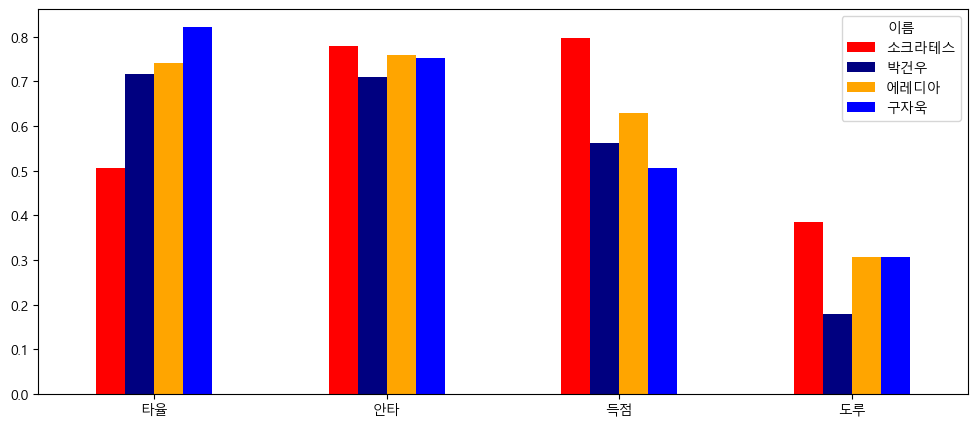

In [146]:
of_23[['이름', '타율', '안타', '득점', '도루']].set_index('이름').T.plot(kind='bar', color = ['red', 'navy', 'orange', 'blue'])
plt.xticks(rotation=360)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '홈런'),
  Text(1, 0, '타점'),
  Text(2, 0, 'OPS'),
  Text(3, 0, 'wRC+'),
  Text(4, 0, 'WAR*')])

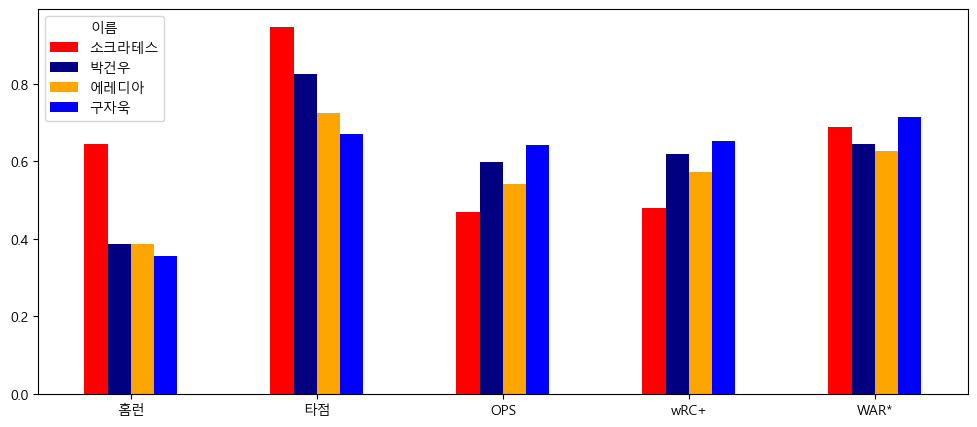

In [148]:
of_23[['이름', '홈런', '타점', 'OPS', 'wRC+', 'WAR*']].set_index('이름').T.plot(kind='bar', color = ['red', 'navy', 'orange', 'blue'])
plt.xticks(rotation=360)

In [157]:
타자_2023 = preprocess_excel_bat('타자_2023')
타자_2023[타자_2023['이름'].isin(['소크라테스', '박건우', '에레디아', '구자욱'])][['이름','타율', '안타', '득점', '도루', '홈런', '타점', 'OPS', 'wRC+', 'WAR*']]

,이름,타율,안타,득점,도루,홈런,타점,OPS,wRC+,WAR*
124,소크라테스,0.285,156,91,15,20,96,0.806,125.7,4.58
141,박건우,0.319,146,70,7,12,85,0.877,148,4.25
145,에레디아,0.323,153,76,12,12,76,0.846,140.7,4.12
147,구자욱,0.336,152,65,12,11,71,0.902,153.2,4.78


In [160]:
dh_23 = bat_23[bat_23['이름'].isin(['손아섭', '전준우', '최형우'])]
dh_23 = dh_23[['이름', '타율', '안타', '득점','홈런', '타점', '도루', 'OPS', 'wRC+', 'WAR*']]

<AxesSubplot:>

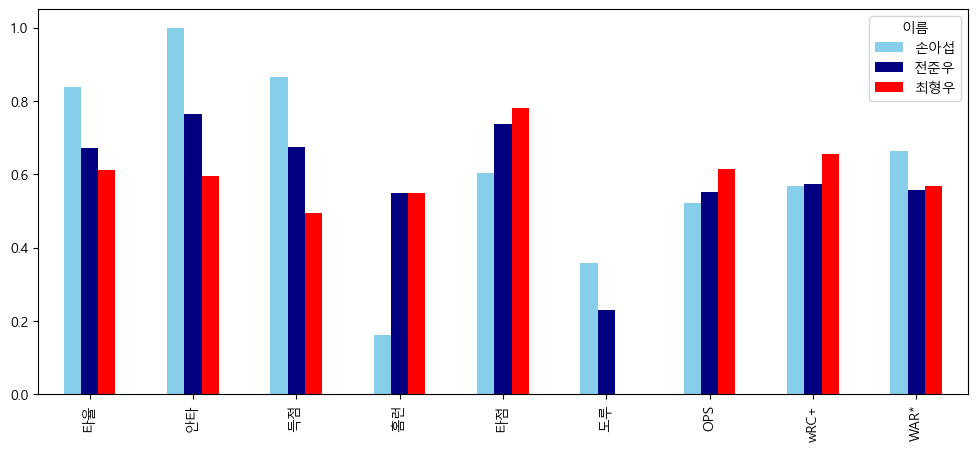

In [166]:
dh_23.set_index('이름').T.plot(kind='bar', color=['skyblue', 'navy', 'red'])

In [167]:
타자_2023 = preprocess_excel_bat('타자_2023')
타자_2023[타자_2023['이름'].isin(['손아섭', '전준우', '최형우'])][['이름','타율', '안타', '득점', '도루', '홈런', '타점', 'OPS', 'wRC+', 'WAR*']]

,이름,타율,안타,득점,도루,홈런,타점,OPS,wRC+,WAR*
123,손아섭,0.339,187,97,14,5,65,0.836,140,4.39
133,전준우,0.312,154,80,9,17,77,0.852,140.8,3.6
151,최형우,0.302,130,64,0,17,81,0.887,153.8,3.68
